# Data Transformation with dplyr

Visualization is an important tool for insight generation, but it is
rare that you get the data in exactly the right form you need. Often
you’ll need to create some new variables or summaries, or maybe
you just want to rename the variables or reorder the observations in
order to make the data a little easier to work with. You’ll learn how
to do all that (and more!) in this chapter, which will teach you how
to transform your data using the dplyr package and a new dataset
on flights departing New York City in 2013.

In [1]:
library(nycflights13)
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [2]:
flights

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


# Filter Rows with filter()

filter() allows you to subset observations based on their values.
The first argument is the name of the data frame. The second and subsequent arguments are the expressions that filter the data frame.
For example, we can select all flights on January 1st with

In [3]:
filter(flights, month == 1, day == 1)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [4]:
jan1 <- filter(flights, month == 1, day == 1)

In [5]:
jan1

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [6]:
(dec25 <- filter(flights, month == 12, day == 25))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,12,25,456,500,-4,649,651,-2,US,1895,N156UW,EWR,CLT,98,529,5,0,2013-12-25 05:00:00
2013,12,25,524,515,9,805,814,-9,UA,1016,N32404,EWR,IAH,203,1400,5,15,2013-12-25 05:00:00
2013,12,25,542,540,2,832,850,-18,AA,2243,N5EBAA,JFK,MIA,146,1089,5,40,2013-12-25 05:00:00
2013,12,25,546,550,-4,1022,1027,-5,B6,939,N665JB,JFK,BQN,191,1576,5,50,2013-12-25 05:00:00
2013,12,25,556,600,-4,730,745,-15,AA,301,N3JLAA,LGA,ORD,123,733,6,0,2013-12-25 06:00:00
2013,12,25,557,600,-3,743,752,-9,DL,731,N369NB,LGA,DTW,88,502,6,0,2013-12-25 06:00:00
2013,12,25,557,600,-3,818,831,-13,DL,904,N397DA,LGA,ATL,118,762,6,0,2013-12-25 06:00:00
2013,12,25,559,600,-1,855,856,-1,B6,371,N608JB,LGA,FLL,147,1076,6,0,2013-12-25 06:00:00
2013,12,25,559,600,-1,849,855,-6,B6,605,N536JB,EWR,FLL,149,1065,6,0,2013-12-25 06:00:00
2013,12,25,600,600,0,850,846,4,B6,583,N746JB,JFK,MCO,137,944,6,0,2013-12-25 06:00:00


# Comparisons

To use filtering effectively, you have to know how to select the observations
that you want using the comparison operators. R provides
the standard suite: >, >=, <, <=, != (not equal), and == (equal).

In [7]:
sqrt(2) ^ 2 == 2

[1] FALSE

In [8]:
1/49 * 49 == 1

[1] FALSE

In [9]:
near(sqrt(2) ^ 2, 2)

[1] TRUE

In [10]:
near(1 / 49 * 49, 1)

[1] TRUE

# Logical Operators

Multiple arguments to filter() are combined with “and”: every
expression must be true in order for a row to be included in the output.
For other types of combinations, you’ll need to use Boolean
operators yourself: & is “and,” | is “or,” and ! is “not.” The following
figure shows the complete set of Boolean operations.

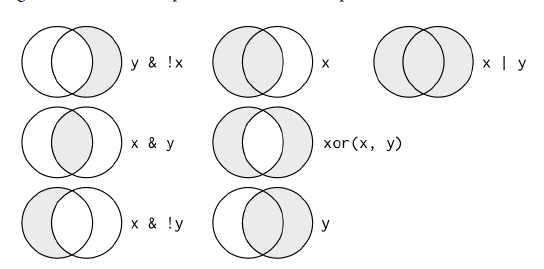

In [11]:
library("IRdisplay")
display_png(file='Images/Capture.PNG',width = 200,height=200)

In [12]:
filter(flights, month == 11 | month == 12)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00
2013,11,1,550,600,-10,705,659,6,US,2167,N748UW,LGA,DCA,57,214,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,659,701,-2,US,2134,N742PS,LGA,BOS,40,184,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,826,827,-1,DL,563,N912DE,LGA,ATL,126,762,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,749,751,-2,DL,731,N315NB,LGA,DTW,93,502,6,0,2013-11-01 06:00:00


A useful shorthand for this problem is x %in% y. This will select
every row where x is one of the values in y. We could use it to
rewrite the preceding code

In [13]:
nov_dec <- filter(flights, month %in% c(11, 12))

In [14]:
nov_dec

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,11,1,5,2359,6,352,345,7,B6,745,N568JB,JFK,PSE,205,1617,23,59,2013-11-01 23:00:00
2013,11,1,35,2250,105,123,2356,87,B6,1816,N353JB,JFK,SYR,36,209,22,50,2013-11-01 22:00:00
2013,11,1,455,500,-5,641,651,-10,US,1895,N192UW,EWR,CLT,88,529,5,0,2013-11-01 05:00:00
2013,11,1,539,545,-6,856,827,29,UA,1714,N38727,LGA,IAH,229,1416,5,45,2013-11-01 05:00:00
2013,11,1,542,545,-3,831,855,-24,AA,2243,N5CLAA,JFK,MIA,147,1089,5,45,2013-11-01 05:00:00
2013,11,1,549,600,-11,912,923,-11,UA,303,N595UA,JFK,SFO,359,2586,6,0,2013-11-01 06:00:00
2013,11,1,550,600,-10,705,659,6,US,2167,N748UW,LGA,DCA,57,214,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,659,701,-2,US,2134,N742PS,LGA,BOS,40,184,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,826,827,-1,DL,563,N912DE,LGA,ATL,126,762,6,0,2013-11-01 06:00:00
2013,11,1,554,600,-6,749,751,-2,DL,731,N315NB,LGA,DTW,93,502,6,0,2013-11-01 06:00:00


In [15]:
filter(flights, !(arr_delay > 120 | dep_delay > 120))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


In [16]:
filter(flights, arr_delay <= 120, dep_delay <= 120)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


# Missing Values

In [17]:
NA > 5

[1] NA

In [18]:
10 == NA

[1] NA

In [19]:
NA + 10

[1] NA

In [20]:
NA / 2

[1] NA

In [21]:
NA == NA

[1] NA

In [22]:
x <- NA

In [23]:
y <- NA

In [24]:
x == y

[1] NA

In [25]:
is.na(x)

[1] TRUE

In [26]:
df <- tibble(x = c(1, NA, 3))
filter(df, x > 1)

x
3


In [27]:
filter(df, is.na(x) | x > 1)

x
NA
3


# Exercises

#### 1. Find all flights that:
###### a. Had an arrival delay of two or more hours

In [28]:
filter(flights, arr_delay > 119 & arr_delay < 121)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,2,1806,1629,97,2008,1808,120,EV,4308,N13550,EWR,RDU,78,416,16,29,2013-01-02 16:00:00
2013,1,10,1801,1619,102,1923,1723,120,EV,4271,N14148,EWR,ALB,32,143,16,19,2013-01-10 16:00:00
2013,1,13,1958,1836,82,2231,2031,120,EV,4437,N16571,EWR,CAE,98,602,18,36,2013-01-13 18:00:00
2013,1,13,2145,2005,100,4,2204,120,EV,4133,N13992,EWR,GSP,98,594,20,5,2013-01-13 20:00:00
2013,1,14,1652,1445,127,1806,1606,120,9E,3452,N934XJ,JFK,BOS,40,187,14,45,2013-01-14 14:00:00
2013,1,15,1603,1446,77,1957,1757,120,UA,337,N819UA,LGA,IAH,242,1416,14,46,2013-01-15 14:00:00
2013,1,21,1957,1815,102,2237,2037,120,9E,3424,N915XJ,JFK,DTW,94,509,18,15,2013-01-21 18:00:00
2013,1,22,1550,1420,90,1820,1620,120,MQ,4588,N539MQ,LGA,MSP,161,1020,14,20,2013-01-22 14:00:00
2013,1,23,1031,825,126,1337,1137,120,B6,181,N603JB,JFK,SAN,342,2446,8,25,2013-01-23 08:00:00
2013,1,23,1805,1619,106,1926,1726,120,EV,4299,N16546,EWR,DCA,48,199,16,19,2013-01-23 16:00:00


##### b. Flew to Houston (IAH or HOU)

In [29]:
filter(flights, dest == 'HOU' | dest == 'IAH')

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,623,627,-4,933,932,1,UA,496,N459UA,LGA,IAH,229,1416,6,27,2013-01-01 06:00:00
2013,1,1,728,732,-4,1041,1038,3,UA,473,N488UA,LGA,IAH,238,1416,7,32,2013-01-01 07:00:00
2013,1,1,739,739,0,1104,1038,26,UA,1479,N37408,EWR,IAH,249,1400,7,39,2013-01-01 07:00:00
2013,1,1,908,908,0,1228,1219,9,UA,1220,N12216,EWR,IAH,233,1400,9,8,2013-01-01 09:00:00
2013,1,1,1028,1026,2,1350,1339,11,UA,1004,N76508,LGA,IAH,237,1416,10,26,2013-01-01 10:00:00
2013,1,1,1044,1045,-1,1352,1351,1,UA,455,N667UA,EWR,IAH,229,1400,10,45,2013-01-01 10:00:00
2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
2013,1,1,1205,1200,5,1503,1505,-2,UA,1461,N39418,EWR,IAH,221,1400,12,0,2013-01-01 12:00:00


##### c. Were operated by United, American, or Delta

In [30]:
filter(flights, carrier == "UA" | carrier == 'AA' | carrier == 'DA')

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,924,917,7,UA,194,N29129,JFK,LAX,345,2475,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,923,937,-14,UA,1124,N53441,EWR,SFO,361,2565,6,0,2013-01-01 06:00:00
2013,1,1,559,600,-1,941,910,31,AA,707,N3DUAA,LGA,DFW,257,1389,6,0,2013-01-01 06:00:00
2013,1,1,559,600,-1,854,902,-8,UA,1187,N76515,EWR,LAS,337,2227,6,0,2013-01-01 06:00:00
2013,1,1,606,610,-4,858,910,-12,AA,1895,N633AA,EWR,MIA,152,1085,6,10,2013-01-01 06:00:00


###### d. Departed in summer (July, August, and September) 

In [31]:
filter(flights, month == 7 | month == 8 | month == 9)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,7,1,1,2029,212,236,2359,157,B6,915,N653JB,JFK,SFO,315,2586,20,29,2013-07-01 20:00:00
2013,7,1,2,2359,3,344,344,0,B6,1503,N805JB,JFK,SJU,200,1598,23,59,2013-07-01 23:00:00
2013,7,1,29,2245,104,151,1,110,B6,234,N348JB,JFK,BTV,66,266,22,45,2013-07-01 22:00:00
2013,7,1,43,2130,193,322,14,188,B6,1371,N794JB,LGA,FLL,143,1076,21,30,2013-07-01 21:00:00
2013,7,1,44,2150,174,300,100,120,AA,185,N324AA,JFK,LAX,297,2475,21,50,2013-07-01 21:00:00
2013,7,1,46,2051,235,304,2358,186,B6,165,N640JB,JFK,PDX,304,2454,20,51,2013-07-01 20:00:00
2013,7,1,48,2001,287,308,2305,243,VX,415,N627VA,JFK,LAX,298,2475,20,1,2013-07-01 20:00:00
2013,7,1,58,2155,183,335,43,172,B6,425,N535JB,JFK,TPA,140,1005,21,55,2013-07-01 21:00:00
2013,7,1,100,2146,194,327,30,177,B6,1183,N531JB,JFK,MCO,126,944,21,46,2013-07-01 21:00:00
2013,7,1,100,2245,135,337,135,122,B6,623,N663JB,JFK,LAX,304,2475,22,45,2013-07-01 22:00:00


##### e. Arrived more than two hours late, but didn’t leave late

In [32]:
filter(flights,arr_delay > 120 & dep_delay <= 0)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,27,1419,1420,-1,1754,1550,124,MQ,3728,N1EAMQ,EWR,ORD,135,719,14,20,2013-01-27 14:00:00
2013,10,7,1350,1350,0,1736,1526,130,EV,5181,N611QX,LGA,MSN,117,812,13,50,2013-10-07 13:00:00
2013,10,7,1357,1359,-2,1858,1654,124,AA,1151,N3CMAA,LGA,DFW,192,1389,13,59,2013-10-07 13:00:00
2013,10,16,657,700,-3,1258,1056,122,B6,3,N703JB,JFK,SJU,225,1598,7,0,2013-10-16 07:00:00
2013,11,1,658,700,-2,1329,1015,194,VX,399,N629VA,JFK,LAX,336,2475,7,0,2013-11-01 07:00:00
2013,3,18,1844,1847,-3,39,2219,140,UA,389,N560UA,JFK,SFO,386,2586,18,47,2013-03-18 18:00:00
2013,4,17,1635,1640,-5,2049,1845,124,MQ,4540,N721MQ,LGA,DTW,130,502,16,40,2013-04-17 16:00:00
2013,4,18,558,600,-2,1149,850,179,AA,707,N3EXAA,LGA,DFW,234,1389,6,0,2013-04-18 06:00:00
2013,4,18,655,700,-5,1213,950,143,AA,2083,N565AA,EWR,DFW,230,1372,7,0,2013-04-18 07:00:00
2013,5,22,1827,1830,-3,2217,2010,127,MQ,4674,N518MQ,LGA,CLE,90,419,18,30,2013-05-22 18:00:00


##### f. Were delayed by at least an hour, but made up over 30 minutes in flight

In [33]:
filter(flights, dep_delay > 60 & air_time > 30)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,811,630,101,1047,830,137,MQ,4576,N531MQ,LGA,CLT,118,544,6,30,2013-01-01 06:00:00
2013,1,1,826,715,71,1136,1045,51,AA,443,N3GVAA,JFK,MIA,160,1089,7,15,2013-01-01 07:00:00
2013,1,1,848,1835,853,1001,1950,851,MQ,3944,N942MQ,JFK,BWI,41,184,18,35,2013-01-01 18:00:00
2013,1,1,957,733,144,1056,853,123,UA,856,N534UA,EWR,BOS,37,200,7,33,2013-01-01 07:00:00
2013,1,1,1114,900,134,1447,1222,145,UA,1086,N76502,LGA,IAH,248,1416,9,0,2013-01-01 09:00:00
2013,1,1,1120,944,96,1331,1213,78,EV,4495,N16561,EWR,SAV,117,708,9,44,2013-01-01 09:00:00
2013,1,1,1301,1150,71,1518,1345,93,MQ,4646,N542MQ,LGA,MSP,170,1020,11,50,2013-01-01 11:00:00
2013,1,1,1337,1220,77,1649,1531,78,B6,673,N636JB,JFK,LAX,352,2475,12,20,2013-01-01 12:00:00
2013,1,1,1400,1250,70,1645,1502,103,EV,4869,N748EV,LGA,MEM,178,963,12,50,2013-01-01 12:00:00
2013,1,1,1505,1310,115,1638,1431,127,EV,4497,N17984,EWR,RIC,63,277,13,10,2013-01-01 13:00:00


#### g. Departed between midnight and 6 a.m. (inclusive)

In [34]:
filter(flights, hour >= 0 & hour <= 6)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


#### 2.How many flights have a missing dep_time? What other variables are missing?


In [35]:
filter(flights, is.na(dep_time) )

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,NA,1630,NA,NA,1815,NA,EV,4308,N18120,EWR,RDU,NA,416,16,30,2013-01-01 16:00:00
2013,1,1,NA,1935,NA,NA,2240,NA,AA,791,N3EHAA,LGA,DFW,NA,1389,19,35,2013-01-01 19:00:00
2013,1,1,NA,1500,NA,NA,1825,NA,AA,1925,N3EVAA,LGA,MIA,NA,1096,15,0,2013-01-01 15:00:00
2013,1,1,NA,600,NA,NA,901,NA,B6,125,N618JB,JFK,FLL,NA,1069,6,0,2013-01-01 06:00:00
2013,1,2,NA,1540,NA,NA,1747,NA,EV,4352,N10575,EWR,CVG,NA,569,15,40,2013-01-02 15:00:00
2013,1,2,NA,1620,NA,NA,1746,NA,EV,4406,N13949,EWR,PIT,NA,319,16,20,2013-01-02 16:00:00
2013,1,2,NA,1355,NA,NA,1459,NA,EV,4434,N10575,EWR,MHT,NA,209,13,55,2013-01-02 13:00:00
2013,1,2,NA,1420,NA,NA,1644,NA,EV,4935,N759EV,EWR,ATL,NA,746,14,20,2013-01-02 14:00:00
2013,1,2,NA,1321,NA,NA,1536,NA,EV,3849,N13550,EWR,IND,NA,645,13,21,2013-01-02 13:00:00
2013,1,2,NA,1545,NA,NA,1910,NA,AA,133,NA,JFK,LAX,NA,2475,15,45,2013-01-02 15:00:00


# Arrange Rows with arrange()


arrange() works similarly to filter() except that instead of selecting rows, it changes their order. It takes a data frame and a set of column names (or more complicated expressions) to order by. If you provide more than one column name, each additional column will be used to break ties in the values of preceding columns:

In [36]:
arrange(flights,year,month,day)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


<b>desc()</b> to arrange in descending order

In [37]:
arrange(flights, desc(arr_delay))

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,9,641,900,1301,1242,1530,1272,HA,51,N384HA,JFK,HNL,640,4983,9,0,2013-01-09 09:00:00
2013,6,15,1432,1935,1137,1607,2120,1127,MQ,3535,N504MQ,JFK,CMH,74,483,19,35,2013-06-15 19:00:00
2013,1,10,1121,1635,1126,1239,1810,1109,MQ,3695,N517MQ,EWR,ORD,111,719,16,35,2013-01-10 16:00:00
2013,9,20,1139,1845,1014,1457,2210,1007,AA,177,N338AA,JFK,SFO,354,2586,18,45,2013-09-20 18:00:00
2013,7,22,845,1600,1005,1044,1815,989,MQ,3075,N665MQ,JFK,CVG,96,589,16,0,2013-07-22 16:00:00
2013,4,10,1100,1900,960,1342,2211,931,DL,2391,N959DL,JFK,TPA,139,1005,19,0,2013-04-10 19:00:00
2013,3,17,2321,810,911,135,1020,915,DL,2119,N927DA,LGA,MSP,167,1020,8,10,2013-03-17 08:00:00
2013,7,22,2257,759,898,121,1026,895,DL,2047,N6716C,LGA,ATL,109,762,7,59,2013-07-22 07:00:00
2013,12,5,756,1700,896,1058,2020,878,AA,172,N5DMAA,EWR,MIA,149,1085,17,0,2013-12-05 17:00:00
2013,5,3,1133,2055,878,1250,2215,875,MQ,3744,N523MQ,EWR,ORD,112,719,20,55,2013-05-03 20:00:00


# Select Columns with select()

It’s not uncommon to get datasets with hundreds or even thousands of variables. In this case, the first challenge is often narrowing in on the variables you’re actually interested in. select() allows you to rapidly zoom in on a useful subset using operations based on the names of the variables. select() is not terribly useful with the flight data because we only have 19 variables, but you can still get the general idea

In [38]:
select(flights,year,month,day)

year,month,day
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [39]:
select(flights, year:day)

year,month,day
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1
2013,1,1


In [40]:
select(flights, -(year:day))

dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


select() can be used to rename variables, but it’s rarely useful because it drops all of the variables not explicitly mentioned. Instead, use rename(), which is a variant of select()that keeps all the variables that aren’t explicitly mentioned

In [41]:
rename(flights,tail_num = tailnum)

year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tail_num,origin,dest,air_time,distance,hour,minute,time_hour
2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,227,1400,5,15,2013-01-01 05:00:00
2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,227,1416,5,29,2013-01-01 05:00:00
2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,160,1089,5,40,2013-01-01 05:00:00
2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,183,1576,5,45,2013-01-01 05:00:00
2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,116,762,6,0,2013-01-01 06:00:00
2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,150,719,5,58,2013-01-01 05:00:00
2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,158,1065,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,53,229,6,0,2013-01-01 06:00:00
2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,140,944,6,0,2013-01-01 06:00:00
2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,138,733,6,0,2013-01-01 06:00:00


Another option is to use select() in conjunction with the everything() helper. This is useful if you have a handful of variables you’d like to move to the start of the data frame

In [42]:
select(flights,time_hour,air_time,everything())

time_hour,air_time,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,distance,hour,minute
2013-01-01 05:00:00,227,2013,1,1,517,515,2,830,819,11,UA,1545,N14228,EWR,IAH,1400,5,15
2013-01-01 05:00:00,227,2013,1,1,533,529,4,850,830,20,UA,1714,N24211,LGA,IAH,1416,5,29
2013-01-01 05:00:00,160,2013,1,1,542,540,2,923,850,33,AA,1141,N619AA,JFK,MIA,1089,5,40
2013-01-01 05:00:00,183,2013,1,1,544,545,-1,1004,1022,-18,B6,725,N804JB,JFK,BQN,1576,5,45
2013-01-01 06:00:00,116,2013,1,1,554,600,-6,812,837,-25,DL,461,N668DN,LGA,ATL,762,6,0
2013-01-01 05:00:00,150,2013,1,1,554,558,-4,740,728,12,UA,1696,N39463,EWR,ORD,719,5,58
2013-01-01 06:00:00,158,2013,1,1,555,600,-5,913,854,19,B6,507,N516JB,EWR,FLL,1065,6,0
2013-01-01 06:00:00,53,2013,1,1,557,600,-3,709,723,-14,EV,5708,N829AS,LGA,IAD,229,6,0
2013-01-01 06:00:00,140,2013,1,1,557,600,-3,838,846,-8,B6,79,N593JB,JFK,MCO,944,6,0
2013-01-01 06:00:00,138,2013,1,1,558,600,-2,753,745,8,AA,301,N3ALAA,LGA,ORD,733,6,0


# Exercises

#### 1. What happens if you include the name of a variable multiple times in a select() call?


In [43]:
select(flights, dep_time, dep_time)

dep_time
517
533
542
544
554
554
555
557
557
558


#### 2.What does the one_of() function do? Why might it be helpful in conjunction with this vector?

In [44]:
vars <- c("year", "month", "day", "dep_delay", "arr_delay")

select(flights, one_of(vars) )


year,month,day,dep_delay,arr_delay
2013,1,1,2,11
2013,1,1,4,20
2013,1,1,2,33
2013,1,1,-1,-18
2013,1,1,-6,-25
2013,1,1,-4,12
2013,1,1,-5,19
2013,1,1,-3,-14
2013,1,1,-3,-8
2013,1,1,-2,8


one_of() is that it just lets you select variables using a character vector of their names instead of putting their names into the select() 

# Add New Variables with mutate()

Besides selecting sets of existing columns, it’s often useful to add new columns that are functions of existing columns. That’s the job of mutate(). mutate() always adds new columns at the end of your dataset so we’ll start by creating a narrower dataset so we can see the new variables. Remember that when you’re in RStudio, the easiest way to see
all the columns is View():


In [45]:
flights_sml <- select(flights,
year:day,
ends_with("delay"),
distance,
air_time
)
mutate(flights_sml,
gain = arr_delay - dep_delay,
speed = distance / air_time * 60)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
2013,1,1,2,11,1400,227,9,370.0441
2013,1,1,4,20,1416,227,16,374.2731
2013,1,1,2,33,1089,160,31,408.3750
2013,1,1,-1,-18,1576,183,-17,516.7213
2013,1,1,-6,-25,762,116,-19,394.1379
2013,1,1,-4,12,719,150,16,287.6000
2013,1,1,-5,19,1065,158,24,404.4304
2013,1,1,-3,-14,229,53,-11,259.2453
2013,1,1,-3,-8,944,140,-5,404.5714
2013,1,1,-2,8,733,138,10,318.6957


In [46]:
mutate(flights_sml,
gain = arr_delay - dep_delay,
hours = air_time / 60,
gain_per_hour = gain / hours
)

year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
2013,1,1,2,11,1400,227,9,3.7833333,2.3788546
2013,1,1,4,20,1416,227,16,3.7833333,4.2290749
2013,1,1,2,33,1089,160,31,2.6666667,11.6250000
2013,1,1,-1,-18,1576,183,-17,3.0500000,-5.5737705
2013,1,1,-6,-25,762,116,-19,1.9333333,-9.8275862
2013,1,1,-4,12,719,150,16,2.5000000,6.4000000
2013,1,1,-5,19,1065,158,24,2.6333333,9.1139241
2013,1,1,-3,-14,229,53,-11,0.8833333,-12.4528302
2013,1,1,-3,-8,944,140,-5,2.3333333,-2.1428571
2013,1,1,-2,8,733,138,10,2.3000000,4.3478261


If you only want to keep the new variables, use <b>transmute():</b>

In [47]:
transmute(flights,
gain = arr_delay - dep_delay,
hours = air_time / 60,
gain_per_hour = gain / hours
)

gain,hours,gain_per_hour
9,3.7833333,2.3788546
16,3.7833333,4.2290749
31,2.6666667,11.6250000
-17,3.0500000,-5.5737705
-19,1.9333333,-9.8275862
16,2.5000000,6.4000000
24,2.6333333,9.1139241
-11,0.8833333,-12.4528302
-5,2.3333333,-2.1428571
10,2.3000000,4.3478261


# Grouped Summaries with summarize()

The last key verb is summarize(). It collapses a data frame to a single row:

In [48]:
summarize(flights, delay = mean(dep_delay,na.rm = TRUE))

delay
12.63907


na. rm in r refers to the logical parameter that tells the function whether or not to remove NA values from the calculation

# Combining Multiple Operations with the Pipe

Imagine that we want to explore the relationship between the distance and average delay for each location. Using what you know about dplyr, you might write code like this

In [49]:
by_day <- group_by(flights, year, month, day)
summarize(by_day, delay = mean(dep_delay, na.rm = TRUE))

year,month,day,delay
2013,1,1,11.548926
2013,1,2,13.858824
2013,1,3,10.987832
2013,1,4,8.951595
2013,1,5,5.732218
2013,1,6,7.148014
2013,1,7,5.417204
2013,1,8,2.553073
2013,1,9,2.276477
2013,1,10,2.844995


In [50]:
by_dest <- group_by(flights, dest)
delay <- summarize(by_dest,
count = n(),dist = mean(distance, na.rm = TRUE),
delay = mean(arr_delay, na.rm = TRUE)
)
delay <- filter(delay, count > 20, dest != "HNL")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


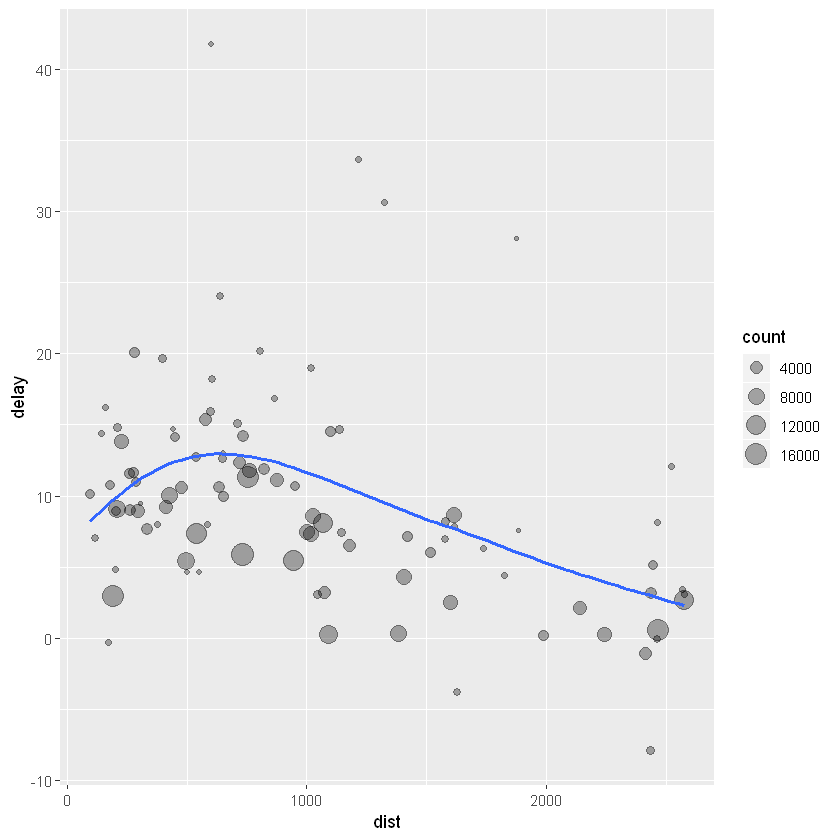

In [51]:
ggplot(data = delay, mapping = aes(x = dist, y = delay)) +
geom_point(aes(size = count), alpha = 1/3) +
geom_smooth(se = FALSE)